## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\benja\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [7]:
"""
Compile 模型
"""
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 19s 385us/step - loss: 1.3830 - acc: 0.5081 - val_loss: 1.4199 - val_acc: 0.4985
Epoch 2/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.3573 - acc: 0.5183 - val_loss: 1.4317 - val_acc: 0.4906
Epoch 3/500
50000/50000 [==============================] - 17s 348us/step - loss: 1.3420 - acc: 0.5197 - val_loss: 1.4272 - val_acc: 0.4935
Epoch 4/500
50000/50000 [==============================] - 22s 438us/step - loss: 1.3115 - acc: 0.5325 - val_loss: 1.4357 - val_acc: 0.4899
Epoch 5/500
50000/50000 [==============================] - 17s 349us/step - loss: 1.2875 - acc: 0.5431 - val_loss: 1.3825 - val_acc: 0.5110
Epoch 6/500
50000/50000 [==============================] - 18s 356us/step - loss: 1.2753 - acc: 0.5440 - val_loss: 1.3833 - val_acc: 0.5088
Epoch 7/500
50000/50000 [==============================] - 20s 394us/step - loss: 1.2437 - acc: 0.5547 - val_l

Epoch 59/500
50000/50000 [==============================] - 24s 475us/step - loss: 0.4921 - acc: 0.8249 - val_loss: 2.1744 - val_acc: 0.5135
Epoch 60/500
50000/50000 [==============================] - 25s 506us/step - loss: 0.4753 - acc: 0.8310 - val_loss: 2.2486 - val_acc: 0.5116
Epoch 61/500
50000/50000 [==============================] - 36s 729us/step - loss: 0.4749 - acc: 0.8305 - val_loss: 2.1974 - val_acc: 0.5136
Epoch 62/500
50000/50000 [==============================] - 40s 799us/step - loss: 0.4578 - acc: 0.8368 - val_loss: 2.2978 - val_acc: 0.5066 acc: 0.8 - ETA: 9s - loss: 0.44 - ET
Epoch 63/500
50000/50000 [==============================] - 39s 771us/step - loss: 0.4700 - acc: 0.8320 - val_loss: 2.2601 - val_acc: 0.5089ETA: 3s - loss: 0.
Epoch 64/500
50000/50000 [==============================] - 40s 793us/step - loss: 0.4479 - acc: 0.8384 - val_loss: 2.3546 - val_acc: 0.5115ETA: 28s - loss: 0.4208 - acc: 0.85 - ETA: 27s - loss: 0.4207 - ETA: 26s  - ETA: 23s  - ETA: - ETA: 

50000/50000 [==============================] - 43s 863us/step - loss: 0.2227 - acc: 0.9195 - val_loss: 3.5446 - val_acc: 0.5055
Epoch 120/500
50000/50000 [==============================] - 31s 629us/step - loss: 0.2279 - acc: 0.9177 - val_loss: 3.4825 - val_acc: 0.5041
Epoch 121/500
50000/50000 [==============================] - 34s 672us/step - loss: 0.2144 - acc: 0.9230 - val_loss: 3.6635 - val_acc: 0.4924
Epoch 122/500
50000/50000 [==============================] - 32s 635us/step - loss: 0.2521 - acc: 0.9096 - val_loss: 3.5194 - val_acc: 0.5017
Epoch 123/500
50000/50000 [==============================] - 30s 610us/step - loss: 0.2292 - acc: 0.9162 - val_loss: 3.6349 - val_acc: 0.4930
Epoch 124/500
50000/50000 [==============================] - 31s 613us/step - loss: 0.2343 - acc: 0.9150 - val_loss: 3.6418 - val_acc: 0.5012
Epoch 125/500
50000/50000 [==============================] - 36s 711us/step - loss: 0.2275 - acc: 0.9189 - val_loss: 3.5625 - val_acc: 0.5014
Epoch 126/500
50000/

50000/50000 [==============================] - 24s 482us/step - loss: 0.1391 - acc: 0.9503 - val_loss: 4.2427 - val_acc: 0.5024
Epoch 176/500
50000/50000 [==============================] - 23s 467us/step - loss: 0.1291 - acc: 0.9549 - val_loss: 4.1702 - val_acc: 0.4958
Epoch 177/500
50000/50000 [==============================] - 23s 468us/step - loss: 0.1334 - acc: 0.9527 - val_loss: 4.2706 - val_acc: 0.4988
Epoch 178/500
50000/50000 [==============================] - 23s 468us/step - loss: 0.1798 - acc: 0.9377 - val_loss: 4.3823 - val_acc: 0.4948
Epoch 179/500
50000/50000 [==============================] - 23s 469us/step - loss: 0.2233 - acc: 0.9243 - val_loss: 4.2070 - val_acc: 0.4956
Epoch 180/500
50000/50000 [==============================] - 24s 483us/step - loss: 0.1766 - acc: 0.9370 - val_loss: 4.2916 - val_acc: 0.4912
Epoch 181/500
50000/50000 [==============================] - 25s 494us/step - loss: 0.1841 - acc: 0.9348 - val_loss: 4.2879 - val_acc: 0.4945
Epoch 182/500
50000/

50000/50000 [==============================] - 46s 922us/step - loss: 0.1244 - acc: 0.9570 - val_loss: 4.6066 - val_acc: 0.4965
Epoch 232/500
50000/50000 [==============================] - 49s 990us/step - loss: 0.1268 - acc: 0.9557 - val_loss: 4.5994 - val_acc: 0.5030
Epoch 233/500
50000/50000 [==============================] - 33s 669us/step - loss: 0.1092 - acc: 0.9611 - val_loss: 4.5643 - val_acc: 0.5054
Epoch 234/500
50000/50000 [==============================] - 26s 513us/step - loss: 0.1025 - acc: 0.9637 - val_loss: 4.6366 - val_acc: 0.5003
Epoch 235/500
50000/50000 [==============================] - 24s 489us/step - loss: 0.1391 - acc: 0.9515 - val_loss: 4.7486 - val_acc: 0.4942
Epoch 236/500
50000/50000 [==============================] - 25s 503us/step - loss: 0.2553 - acc: 0.9194 - val_loss: 4.6344 - val_acc: 0.4932
Epoch 237/500
50000/50000 [==============================] - 41s 814us/step - loss: 0.1461 - acc: 0.9498 - val_loss: 4.6918 - val_acc: 0.4985
Epoch 238/500
50000/

50000/50000 [==============================] - 26s 522us/step - loss: 0.1525 - acc: 0.9490 - val_loss: 4.9469 - val_acc: 0.4878
Epoch 289/500
50000/50000 [==============================] - 25s 502us/step - loss: 0.1680 - acc: 0.9440 - val_loss: 5.0006 - val_acc: 0.4896
Epoch 290/500
50000/50000 [==============================] - 25s 492us/step - loss: 0.1582 - acc: 0.9478 - val_loss: 4.8291 - val_acc: 0.4989
Epoch 291/500
50000/50000 [==============================] - 24s 483us/step - loss: 0.0707 - acc: 0.9760 - val_loss: 4.7875 - val_acc: 0.5071
Epoch 292/500
50000/50000 [==============================] - 24s 487us/step - loss: 0.0666 - acc: 0.9761 - val_loss: 4.9070 - val_acc: 0.5017
Epoch 293/500
50000/50000 [==============================] - 25s 493us/step - loss: 0.0620 - acc: 0.9786 - val_loss: 4.9252 - val_acc: 0.5015
Epoch 294/500
50000/50000 [==============================] - 25s 490us/step - loss: 0.1387 - acc: 0.9542 - val_loss: 4.9429 - val_acc: 0.4961
Epoch 295/500
50000/

50000/50000 [==============================] - 21s 416us/step - loss: 0.2034 - acc: 0.9373 - val_loss: 5.0542 - val_acc: 0.4932
Epoch 346/500
50000/50000 [==============================] - 21s 427us/step - loss: 0.0884 - acc: 0.9704 - val_loss: 5.0185 - val_acc: 0.5028
Epoch 347/500
50000/50000 [==============================] - 21s 424us/step - loss: 0.0479 - acc: 0.9841 - val_loss: 5.0099 - val_acc: 0.5001
Epoch 348/500
50000/50000 [==============================] - 21s 425us/step - loss: 0.0369 - acc: 0.9878 - val_loss: 5.0025 - val_acc: 0.5003
Epoch 349/500
50000/50000 [==============================] - 21s 424us/step - loss: 0.0455 - acc: 0.9846 - val_loss: 5.0981 - val_acc: 0.4981
Epoch 350/500
50000/50000 [==============================] - 21s 427us/step - loss: 0.1221 - acc: 0.9599 - val_loss: 5.1879 - val_acc: 0.4817
Epoch 351/500
50000/50000 [==============================] - 22s 431us/step - loss: 0.3177 - acc: 0.9116 - val_loss: 5.2417 - val_acc: 0.4778
Epoch 352/500
50000/

50000/50000 [==============================] - 42s 833us/step - loss: 0.1444 - acc: 0.9533 - val_loss: 5.0909 - val_acc: 0.4913
Epoch 403/500
50000/50000 [==============================] - 37s 749us/step - loss: 0.1622 - acc: 0.9479 - val_loss: 5.0592 - val_acc: 0.4969
Epoch 404/500
50000/50000 [==============================] - 39s 778us/step - loss: 0.0720 - acc: 0.9751 - val_loss: 5.1271 - val_acc: 0.4927
Epoch 405/500
50000/50000 [==============================] - 35s 706us/step - loss: 0.0513 - acc: 0.9825 - val_loss: 5.0370 - val_acc: 0.4998
Epoch 406/500
50000/50000 [==============================] - 32s 634us/step - loss: 0.0408 - acc: 0.9872 - val_loss: 5.1451 - val_acc: 0.5024
Epoch 407/500
50000/50000 [==============================] - 28s 561us/step - loss: 0.1311 - acc: 0.9595 - val_loss: 5.2506 - val_acc: 0.4797
Epoch 408/500
50000/50000 [==============================] - 33s 661us/step - loss: 0.1715 - acc: 0.9473 - val_loss: 5.0372 - val_acc: 0.4960
Epoch 409/500
50000/

Epoch 460/500
50000/50000 [==============================] - 24s 483us/step - loss: 0.0031 - acc: 0.9999 - val_loss: 5.0302 - val_acc: 0.5070
Epoch 461/500
50000/50000 [==============================] - 24s 486us/step - loss: 0.0029 - acc: 0.9999 - val_loss: 5.0274 - val_acc: 0.5099
Epoch 462/500
50000/50000 [==============================] - 24s 475us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 5.0744 - val_acc: 0.5054
Epoch 463/500
50000/50000 [==============================] - 24s 472us/step - loss: 0.7893 - acc: 0.8528 - val_loss: 4.6350 - val_acc: 0.4721
Epoch 464/500
50000/50000 [==============================] - 24s 473us/step - loss: 0.3638 - acc: 0.8960 - val_loss: 4.5754 - val_acc: 0.4867
Epoch 465/500
50000/50000 [==============================] - 24s 472us/step - loss: 0.0889 - acc: 0.9709 - val_loss: 4.5566 - val_acc: 0.4970
Epoch 466/500
50000/50000 [==============================] - 24s 475us/step - loss: 0.0408 - acc: 0.9874 - val_loss: 4.6331 - val_acc: 0.5026
Epoch 

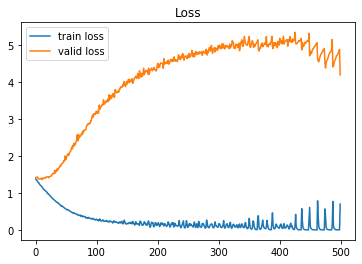

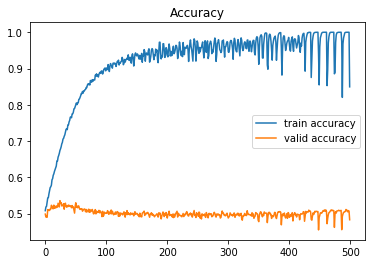

In [13]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [15]:
model = build_mlp()
model.summary()

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='SGD')

model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 15s 307us/step - loss: 

50000/50000 [==============================] - 27s 541us/step - loss: 1.2368 - acc: 0.5673 - val_loss: 1.5879 - val_acc: 0.4432
Epoch 52/500
50000/50000 [==============================] - 21s 419us/step - loss: 1.2223 - acc: 0.5695 - val_loss: 1.4174 - val_acc: 0.4911
Epoch 53/500
50000/50000 [==============================] - 25s 505us/step - loss: 1.2216 - acc: 0.5723 - val_loss: 1.3935 - val_acc: 0.4956
Epoch 54/500
50000/50000 [==============================] - 23s 464us/step - loss: 1.2167 - acc: 0.5734 - val_loss: 1.4230 - val_acc: 0.4920
Epoch 55/500
50000/50000 [==============================] - 20s 392us/step - loss: 1.2108 - acc: 0.5774 - val_loss: 1.4658 - val_acc: 0.4710
Epoch 56/500
50000/50000 [==============================] - 20s 400us/step - loss: 1.2012 - acc: 0.5790 - val_loss: 1.4308 - val_acc: 0.4937
Epoch 57/500
50000/50000 [==============================] - 19s 386us/step - loss: 1.1964 - acc: 0.5812 - val_loss: 1.4823 - val_acc: 0.4858
Epoch 58/500
50000/50000 [

50000/50000 [==============================] - 18s 367us/step - loss: 0.9177 - acc: 0.6804 - val_loss: 1.4285 - val_acc: 0.5171
Epoch 110/500
50000/50000 [==============================] - 19s 383us/step - loss: 0.9068 - acc: 0.6849 - val_loss: 1.4988 - val_acc: 0.4997
Epoch 111/500
50000/50000 [==============================] - 19s 383us/step - loss: 0.8965 - acc: 0.6884 - val_loss: 1.4455 - val_acc: 0.5139
Epoch 112/500
50000/50000 [==============================] - 19s 385us/step - loss: 0.8967 - acc: 0.6876 - val_loss: 1.4550 - val_acc: 0.5065
Epoch 113/500
50000/50000 [==============================] - 20s 392us/step - loss: 0.8885 - acc: 0.6924 - val_loss: 1.5408 - val_acc: 0.4920
Epoch 114/500
50000/50000 [==============================] - 19s 373us/step - loss: 0.8831 - acc: 0.6952 - val_loss: 1.5534 - val_acc: 0.4788
Epoch 115/500
50000/50000 [==============================] - 19s 378us/step - loss: 0.8773 - acc: 0.6967 - val_loss: 1.4254 - val_acc: 0.5218
Epoch 116/500
50000/

50000/50000 [==============================] - 21s 411us/step - loss: 0.6281 - acc: 0.7868 - val_loss: 1.6065 - val_acc: 0.5071
Epoch 167/500
50000/50000 [==============================] - 21s 411us/step - loss: 0.6104 - acc: 0.7922 - val_loss: 1.5254 - val_acc: 0.5333
Epoch 168/500
50000/50000 [==============================] - 21s 416us/step - loss: 0.6089 - acc: 0.7934 - val_loss: 1.7597 - val_acc: 0.4823
Epoch 169/500
50000/50000 [==============================] - 21s 412us/step - loss: 0.6057 - acc: 0.7947 - val_loss: 1.7547 - val_acc: 0.5024
Epoch 170/500
50000/50000 [==============================] - 21s 410us/step - loss: 0.6105 - acc: 0.7939 - val_loss: 1.8262 - val_acc: 0.4820
Epoch 171/500
50000/50000 [==============================] - 21s 412us/step - loss: 0.6147 - acc: 0.7900 - val_loss: 1.6643 - val_acc: 0.4993
Epoch 172/500
50000/50000 [==============================] - 20s 405us/step - loss: 0.5883 - acc: 0.7997 - val_loss: 1.5846 - val_acc: 0.5373
Epoch 173/500
50000/

Epoch 224/500
50000/50000 [==============================] - 22s 446us/step - loss: 0.3731 - acc: 0.8830 - val_loss: 1.9463 - val_acc: 0.5063
Epoch 225/500
50000/50000 [==============================] - 22s 442us/step - loss: 0.3405 - acc: 0.8925 - val_loss: 1.8748 - val_acc: 0.5308
Epoch 226/500
50000/50000 [==============================] - 22s 447us/step - loss: 0.3609 - acc: 0.8872 - val_loss: 1.9179 - val_acc: 0.5205
Epoch 227/500
50000/50000 [==============================] - 23s 452us/step - loss: 0.3477 - acc: 0.8897 - val_loss: 1.8919 - val_acc: 0.5243
Epoch 228/500
50000/50000 [==============================] - 23s 451us/step - loss: 0.3264 - acc: 0.8965 - val_loss: 1.8805 - val_acc: 0.5256
Epoch 229/500
50000/50000 [==============================] - 23s 455us/step - loss: 0.3284 - acc: 0.8970 - val_loss: 2.1995 - val_acc: 0.4870
Epoch 230/500
50000/50000 [==============================] - 23s 458us/step - loss: 0.3395 - acc: 0.8932 - val_loss: 1.9036 - val_acc: 0.5168
Epoch 

Epoch 282/500
50000/50000 [==============================] - 22s 444us/step - loss: 0.1768 - acc: 0.9572 - val_loss: 2.1764 - val_acc: 0.5414
Epoch 283/500
50000/50000 [==============================] - 22s 440us/step - loss: 0.1125 - acc: 0.9766 - val_loss: 2.1892 - val_acc: 0.5406
Epoch 284/500
50000/50000 [==============================] - 22s 440us/step - loss: 0.2451 - acc: 0.9415 - val_loss: 2.1810 - val_acc: 0.5381
Epoch 285/500
50000/50000 [==============================] - 22s 441us/step - loss: 0.1370 - acc: 0.9682 - val_loss: 2.1765 - val_acc: 0.5444
Epoch 286/500
50000/50000 [==============================] - 22s 440us/step - loss: 0.2340 - acc: 0.9408 - val_loss: 2.0651 - val_acc: 0.5273
Epoch 287/500
50000/50000 [==============================] - 22s 439us/step - loss: 0.2569 - acc: 0.9351 - val_loss: 2.2796 - val_acc: 0.5292
Epoch 288/500
50000/50000 [==============================] - 22s 443us/step - loss: 0.1108 - acc: 0.9767 - val_loss: 2.2100 - val_acc: 0.5390
Epoch 

Epoch 340/500
50000/50000 [==============================] - 21s 418us/step - loss: 0.2265 - acc: 0.9509 - val_loss: 2.6491 - val_acc: 0.4895
Epoch 341/500
50000/50000 [==============================] - 21s 418us/step - loss: 0.4641 - acc: 0.8768 - val_loss: 2.3977 - val_acc: 0.5372
Epoch 342/500
50000/50000 [==============================] - 21s 418us/step - loss: 0.0534 - acc: 0.9932 - val_loss: 2.5962 - val_acc: 0.5331
Epoch 343/500
50000/50000 [==============================] - 21s 418us/step - loss: 0.0428 - acc: 0.9952 - val_loss: 2.4669 - val_acc: 0.5416
Epoch 344/500
50000/50000 [==============================] - 21s 426us/step - loss: 0.0385 - acc: 0.9967 - val_loss: 2.4745 - val_acc: 0.5421
Epoch 345/500
50000/50000 [==============================] - 22s 438us/step - loss: 0.0366 - acc: 0.9966 - val_loss: 2.5046 - val_acc: 0.5460
Epoch 346/500
50000/50000 [==============================] - 21s 430us/step - loss: 0.0346 - acc: 0.9969 - val_loss: 2.5083 - val_acc: 0.5456
Epoch 

50000/50000 [==============================] - 21s 414us/step - loss: 0.0143 - acc: 0.9997 - val_loss: 2.7710 - val_acc: 0.5479
Epoch 398/500
50000/50000 [==============================] - 21s 411us/step - loss: 0.0141 - acc: 0.9997 - val_loss: 2.7733 - val_acc: 0.5458
Epoch 399/500
50000/50000 [==============================] - 21s 413us/step - loss: 0.0139 - acc: 0.9997 - val_loss: 2.7862 - val_acc: 0.5443
Epoch 400/500
50000/50000 [==============================] - 21s 416us/step - loss: 0.0136 - acc: 0.9998 - val_loss: 2.7832 - val_acc: 0.5439
Epoch 401/500
50000/50000 [==============================] - 22s 433us/step - loss: 0.0136 - acc: 0.9996 - val_loss: 2.7933 - val_acc: 0.5440
Epoch 402/500
50000/50000 [==============================] - 21s 416us/step - loss: 0.0134 - acc: 0.9996 - val_loss: 2.8053 - val_acc: 0.5441
Epoch 403/500
50000/50000 [==============================] - 21s 418us/step - loss: 0.0131 - acc: 0.9998 - val_loss: 2.8037 - val_acc: 0.5455
Epoch 404/500
50000/

50000/50000 [==============================] - 20s 395us/step - loss: 0.0073 - acc: 1.0000 - val_loss: 3.0064 - val_acc: 0.5416
Epoch 455/500
50000/50000 [==============================] - 20s 391us/step - loss: 0.0072 - acc: 1.0000 - val_loss: 2.9987 - val_acc: 0.5440
Epoch 456/500
50000/50000 [==============================] - 19s 390us/step - loss: 0.0071 - acc: 1.0000 - val_loss: 3.0008 - val_acc: 0.5466 0.0071  - ETA: 2s -
Epoch 457/500
50000/50000 [==============================] - 20s 396us/step - loss: 0.0071 - acc: 1.0000 - val_loss: 3.0108 - val_acc: 0.5448.0071 - acc: 1 - ETA: 1s - loss: 0.0
Epoch 458/500
50000/50000 [==============================] - 21s 410us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 3.0196 - val_acc: 0.5430
Epoch 459/500
50000/50000 [==============================] - 20s 400us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 3.0185 - val_acc: 0.5426
Epoch 460/500
50000/50000 [==============================] - 20s 398us/step - loss: 0.0069 - acc: 1.0000 -

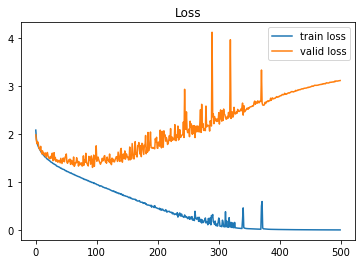

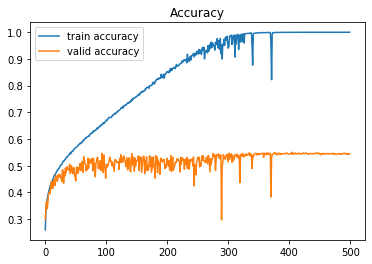

In [16]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
#SGD 非常地不穩定的跳動 loss跟accuracy一直上下擺動